In [1]:
import math

# Given values in meters
c = 1500.0  # Speed of sound [m/s]
f0 = 2.5e6  # Center frequency, transmitted pulse [Hz]
num_elements = 31.0  # Number of elements [grid points]
angle = 0.0  # Steering angle [deg]
rFocus = 5e-3#10000e-3#  # Focal radius, transducer [m]
cycles = 20.0  # No of cycles in pulse

# Define lambda (wavelength)
lambda_value = c / f0  # Wavelength in meters

# Defining grid
Nx = 256.0  # number of grid points in the x (row) direction
Ny = Nx / 2.0  # number of grid points in the y (column) direction
dx = c / f0 / 3.0 * (f0 / 2.5e6)  # grid point spacing in the x direction [m]
dy = dx  # grid point spacing in the y direction [m]
x_offset = 20.0

D = num_elements * dx  # Aperture size

# Calculate theoretical angle using the given formula in radians
theta_6dB_theoretical = 1.21 * lambda_value / D
theta_6dB_theoretical_deg = math.degrees(theta_6dB_theoretical)

# Compute far field distance in meters
R_farfield = D ** 2 / (4.0 * lambda_value)*1000

# Print the results
print("Theta_6dB_theoretical (Degrees):", theta_6dB_theoretical_deg)
print("R_farfield (mm):", R_farfield)

# Depths in mm
depths_mm = [10, 25, 40]

# Convert the depths to meters as all other values are in meters
depths_m = [depth / 1000 for depth in depths_mm]

# Iterate through each depth and calculate the beamwidth
for depth in depths_m:
    beamwidth_m = 2 * depth * math.tan(math.radians(theta_6dB_theoretical_deg))
    beamwidth_mm = beamwidth_m * 1000  # Convert back to mm for the final result
    print("Theoretical Beamwidth at depth", depth * 1000, "mm:", beamwidth_mm, "mm")


Theta_6dB_theoretical (Degrees): 6.709150955886735
R_farfield (mm): 16.01666666666667
Theoretical Beamwidth at depth 10.0 mm: 2.352698455747927 mm
Theoretical Beamwidth at depth 25.0 mm: 5.881746139369818 mm
Theoretical Beamwidth at depth 40.0 mm: 9.410793822991709 mm


In [2]:
import math

# Given values
c = 1500.0  # Speed of sound [m/s]
f0 = 2.5e6  # Center frequency, transmitted pulse [Hz]
num_elements = 31.0  # Number of elements [grid points]

# Define lambda (wavelength)
lambda_value = c / f0  # Wavelength in meters

# Defining grid
dx = c / f0 / 3.0 * (f0 / 2.5e6)  # grid point spacing in the x direction [m]
D_Rindal = num_elements * dx  # Aperture size calculated using Rindal's method
a = D_Rindal / 2  # radius of the aperture

# Depths in mm
depths_mm = [5, 10, 15]

# Iterate through each depth and calculate the beamwidth using D_Rindal
for depth in depths_mm:
    depth_m = depth / 1000  # Convert depth to meters
    F = depth_m  # Focal range
    
    # Calculate D using Cox and Treeby Eq. (9.22)
    D_Cox_Treeby = 9.7 * lambda_value * (F / (2 * a))**2
    
    # Calculate theoretical angle using Rindal's formula with D_Rindal
    theta_6dB_theoretical_Rindal = 1.21 * lambda_value / D_Rindal
    beamwidth_m_Rindal = 2 * depth_m * math.tan(theta_6dB_theoretical_Rindal)
    beamwidth_mm_Rindal = beamwidth_m_Rindal * 1000  # Convert beamwidth back to mm for the final result
    
    # Print the Beamwidth results using Rindal's D
    print(f"Theoretical Beamwidth at depth {depth} mm using Rindal's D: {beamwidth_mm_Rindal} mm")
    
    # Calculate the Depth of Field using Hendrix and Hykes Eq. (4)
    depth_of_field_Hendrix_Hykes = (7.1 * lambda_value * F**2) / a**2
    depth_of_field_Hendrix_Hykes_mm = depth_of_field_Hendrix_Hykes * 1000  # Convert to mm
    
    # Print the Depth of Field result
    print("Depth of Field (Hendrix and Hykes) at depth", depth, "mm:", depth_of_field_Hendrix_Hykes_mm, "mm")
    
    # Print D_Cox_Treeby for reference
    print(f"D_Cox_Treeby at depth {depth} mm: {D_Cox_Treeby * 1000} mm")


Theoretical Beamwidth at depth 5 mm using Rindal's D: 1.1763492278739636 mm
Depth of Field (Hendrix and Hykes) at depth 5 mm: 11.08220603537981 mm
D_Cox_Treeby at depth 5 mm: 3.7851196670135274 mm
Theoretical Beamwidth at depth 10 mm using Rindal's D: 2.352698455747927 mm
Depth of Field (Hendrix and Hykes) at depth 10 mm: 44.32882414151924 mm
D_Cox_Treeby at depth 10 mm: 15.14047866805411 mm
Theoretical Beamwidth at depth 15 mm using Rindal's D: 3.5290476836218905 mm
Depth of Field (Hendrix and Hykes) at depth 15 mm: 99.7398543184183 mm
D_Cox_Treeby at depth 15 mm: 34.06607700312175 mm


In [3]:
import math

# Given values
c = 1500.0  # Speed of sound [m/s]
f0 = 2.5e6  # Center frequency, transmitted pulse [Hz]
num_elements = 31.0  # Number of elements [grid points]

# Define lambda (wavelength)
lambda_value = c / f0  # Wavelength in meters

# Defining grid
dx = c / f0 / 3.0 * (f0 / 2.5e6)  # grid point spacing in the x direction [m]
D_Rindal = num_elements * dx  # Aperture size calculated using Rindal's method
a = D_Rindal / 2  # radius of the aperture

# Depths in mm
depths_mm = [5, 10, 15]

# Focal radii in m
focal_radii = [5e-3, 15e-3]

# Iterate through each focal radius and depth
for rFocus in focal_radii:
    print(f"\nCalculations for rFocus: {rFocus * 1000} mm")
    
    for depth in depths_mm:
        depth_m = depth / 1000  # Convert depth to meters
        F = depth_m  # Focal range

        # Perform calculations as needed with rFocus
        # ...

        # Calculate D using Cox and Treeby Eq. (9.22)
        D_Cox_Treeby = 9.7 * lambda_value * (F / (2 * a))**2

        # Calculate theoretical angle using Rindal's formula with D_Rindal
        theta_6dB_theoretical_Rindal = 1.21 * lambda_value / D_Rindal
        beamwidth_m_Rindal = 2 * depth_m * math.tan(theta_6dB_theoretical_Rindal)
        beamwidth_mm_Rindal = beamwidth_m_Rindal * 1000  # Convert beamwidth back to mm for the final result

        # Print the Beamwidth results using Rindal's D
        print(f"Theoretical Beamwidth at depth {depth} mm using Rindal's D: {beamwidth_mm_Rindal} mm")

        # Calculate the Depth of Field using Hendrix and Hykes Eq. (4)
        depth_of_field_Hendrix_Hykes = (7.1 * lambda_value * F**2) / a**2
        depth_of_field_Hendrix_Hykes_mm = depth_of_field_Hendrix_Hykes * 1000  # Convert to mm

        # Print the Depth of Field result
        print("Depth of Field (Hendrix and Hykes) at depth", depth, "mm:", depth_of_field_Hendrix_Hykes_mm, "mm")

        # Print D_Cox_Treeby for reference
        print(f"D_Cox_Treeby at depth {depth} mm: {D_Cox_Treeby * 1000} mm")



Calculations for rFocus: 5.0 mm
Theoretical Beamwidth at depth 5 mm using Rindal's D: 1.1763492278739636 mm
Depth of Field (Hendrix and Hykes) at depth 5 mm: 11.08220603537981 mm
D_Cox_Treeby at depth 5 mm: 3.7851196670135274 mm
Theoretical Beamwidth at depth 10 mm using Rindal's D: 2.352698455747927 mm
Depth of Field (Hendrix and Hykes) at depth 10 mm: 44.32882414151924 mm
D_Cox_Treeby at depth 10 mm: 15.14047866805411 mm
Theoretical Beamwidth at depth 15 mm using Rindal's D: 3.5290476836218905 mm
Depth of Field (Hendrix and Hykes) at depth 15 mm: 99.7398543184183 mm
D_Cox_Treeby at depth 15 mm: 34.06607700312175 mm

Calculations for rFocus: 15.0 mm
Theoretical Beamwidth at depth 5 mm using Rindal's D: 1.1763492278739636 mm
Depth of Field (Hendrix and Hykes) at depth 5 mm: 11.08220603537981 mm
D_Cox_Treeby at depth 5 mm: 3.7851196670135274 mm
Theoretical Beamwidth at depth 10 mm using Rindal's D: 2.352698455747927 mm
Depth of Field (Hendrix and Hykes) at depth 10 mm: 44.3288241415192

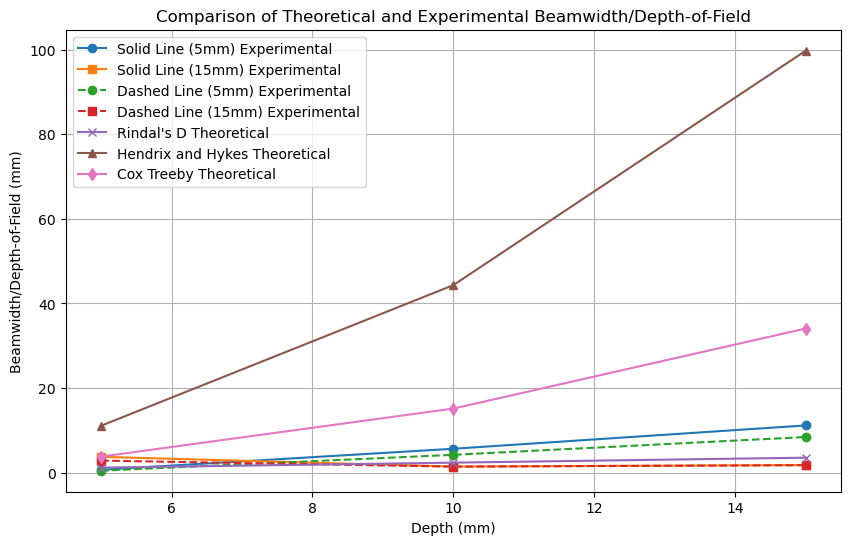

In [4]:
import matplotlib.pyplot as plt

# Given data
depths = [5, 10, 15]

# Experimental values
beamwidth_solid_line_5mm = [0.669, 5.6399, 11.1523]
beamwidth_dashed_line_5mm = [0.446, 4.206, 8.412]

beamwidth_solid_line_15mm = [3.7281, 1.4339, 1.7843]
beamwidth_dashed_line_15mm = [2.8359, 1.4132, 1.7541]

# Theoretical values
rindal_d = [1.176, 2.353, 3.529]
hendrix_hykes = [11.082, 44.329, 99.740]
cox_treeby = [3.785, 15.140, 34.066]

# Plotting the data
plt.figure(figsize=(10,6))

# Solid Line plots
plt.plot(depths, beamwidth_solid_line_5mm, 'o-', label="Solid Line (5mm) Experimental")
plt.plot(depths, beamwidth_solid_line_15mm, 's-', label="Solid Line (15mm) Experimental")

# Dashed Line plots
plt.plot(depths, beamwidth_dashed_line_5mm, 'o--', label="Dashed Line (5mm) Experimental")
plt.plot(depths, beamwidth_dashed_line_15mm, 's--', label="Dashed Line (15mm) Experimental")

# Theoretical plots
plt.plot(depths, rindal_d, 'x-', label="Rindal's D Theoretical")
plt.plot(depths, hendrix_hykes, '^-', label="Hendrix and Hykes Theoretical")
plt.plot(depths, cox_treeby, 'd-', label="Cox Treeby Theoretical")

plt.xlabel('Depth (mm)')
plt.ylabel('Beamwidth/Depth-of-Field (mm)')
plt.title('Comparison of Theoretical and Experimental Beamwidth/Depth-of-Field')
plt.legend()
plt.grid(True)
plt.savefig('comparison_plot.pdf', format='pdf', bbox_inches='tight')

plt.show()
plt.show()


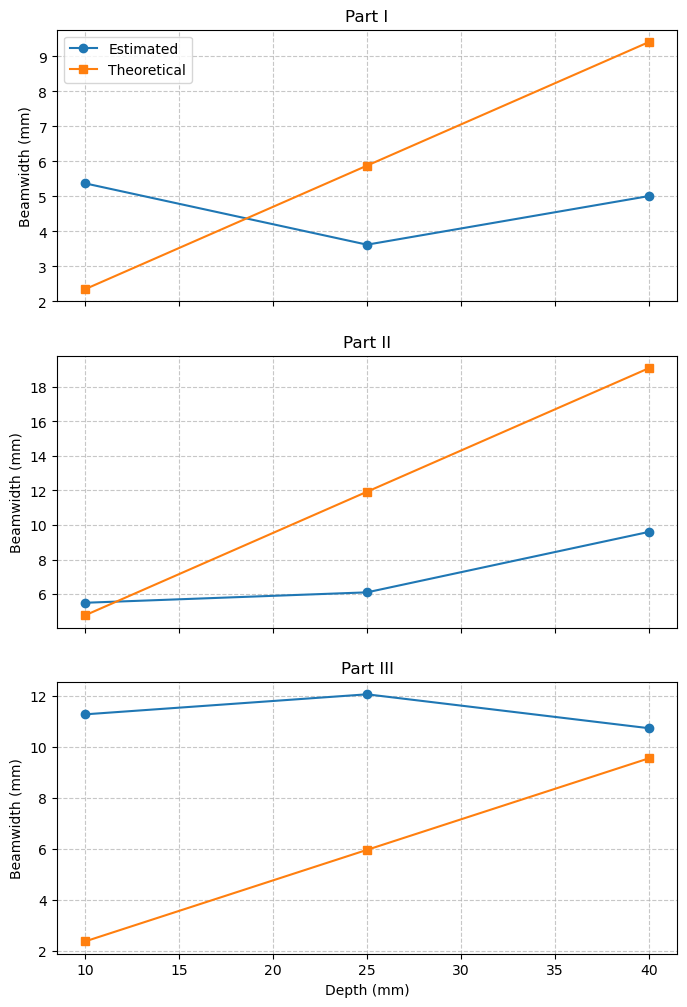

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
parts = ['I', 'II', 'III']
depths = [10, 25, 40]
estimated_beamwidths = {
    'I': [5.3738, 3.6228, 5.0115],
    'II': [5.4946, 6.0984, 9.6004],
    'III': [11.291, 12.0759, 10.7476]
}
theoretical_beamwidths = {
    'I': [2.3527, 5.8817, 9.4108],
    'II': [4.7714, 11.9286, 19.0857],
    'III': [2.3916, 5.9791, 9.5665]
}

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for i, part in enumerate(parts):
    ax = axs[i]
    ax.plot(depths, estimated_beamwidths[part], 'o-', label='Estimated')
    ax.plot(depths, theoretical_beamwidths[part], 's-', label='Theoretical')
    ax.set_title(f'Part {part}')
    ax.set_ylabel('Beamwidth (mm)')
    ax.grid(True, linestyle='--', alpha=0.7)
    if i == 0:
        ax.legend()

axs[-1].set_xlabel('Depth (mm)')

# Save the figure in PDF format
plt.savefig('beamwidth_comparison_subplots.pdf')

# Show the plot
plt.show()
